**Chapter 01 [Language Processing and Python](http://www.nltk.org/book/ch01.html)**

我们很容易获取上百万的文本数据，能通过简单的程序做些什么？本章将回答以下问题：

1. 我们能通过简单的编程技术处理大量的文本吗？
1. 如何自动提取关键词和短语并总结文本的风格和内容？
1. Python 提供了什么工具和技术来做这些工作？
1. 什么是自然语言处理的有意思的挑战？

# 计算机语言：文本和单词
我们很熟悉文本，每天都对它读读写写。这里我们尝试将文本作为我们缩写的程序的原始数据，程序通过各种有趣的方式操作和分析。但是在这之前，我们先了解 Python。

## 了解Python
## 了解NLTK

我们先下载 https://github.com/nltk/nltk_data ，然后通过 IPythn 导入。`from nltk.book import *`。

In [1]:
import nltk
nltk.data.find(".")

FileSystemPathPointer('/home/qinjh/nltk_data')

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


任何时候我们都可以找到这些文本，只需输入文本名称：

In [4]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [5]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

## 查找文本

有很多方式通过简单阅读来检测文本的上下文。索引试图展示给定单词的出现，并伴随上下文。这里在《Moby Dick》查找单词 *monstrous* ：

In [7]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


第一次在指定文本使用 *concordance* ，它花费几秒钟时间构建索引以便后续的快速查找。

一旦花了些时间来研究这些文本，我们希望你对语言的丰富性和多样性有新的认识。在下一张，你将学习如何访问大量的文本，包括英语之外的其他语言。

一个索引允许我们在上下文查找单词。例如我们在上下文中看到的 *monstrous* 类似 `the __ pictures`, `the __ size` 。有些什么单词出现在类似的上下文？ 我们可以通过 `similar` 找出类似名称的文本，然后在括号中插入相关词：

In [10]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [11]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [12]:
text3.similar("monstrous")

No matches


> `similar()` 函数会在文本中 搜索具有类似结构的其他单词, 不过貌似这个函数只会考虑一些简单的指标,来作为相似度,比如上下文的词性,更多的完整匹配, 不会涉及到语义. 
>
> 这个可以看出的是, text1 和text2 对同一个单词monstrous 的不同使用风格.

观察后我们在不同的文本得到不同的结果。_Austen_ 使用这个单词与 _Melville_ 十分不同，对于她，_monstrous_ 有着正面内涵，有时候它的功能就像 _very_ 的增强剂。

术语 `common_contexts` 允许我们检测这个词的上下文所共享的两个或两个以上的单词，例如 _monstrous_ 和 _very_ ：

In [13]:
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


它自动检测指定单词在文本中的出现，并将出现相同上下文的展示出来。然而，我们也可以确定在文本中的单词 _location_ ：从它开始出现有多少单词。位置信息可以通过 `disperslon_plot` 展示。每一条表示一个单词的实例，每一行表示整个文本。在下图，我们看到几个单词在文本中的大致位置（前提是得安装好 Numpy 和 Matplotlib）：

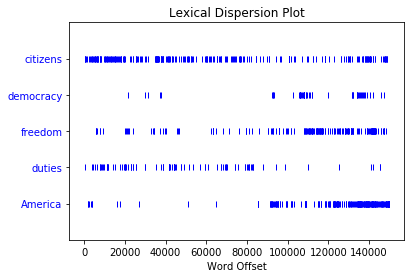

In [18]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

现在，我们尝试生成一些我们刚才见过的各种风格的随机文本。我们使用 `generate()` ：

In [26]:
text3.generate()

Building ngram index...


laid by her , and said unto Cain , Where art thou , and said , Go to ,
I will not do it for ten ' s sons ; we dreamed each man according to
their generatio the firstborn said unto Laban , Because I said , Nay ,
but Sarah shall her name be . , duke Elah , duke Shobal , and Akan .
and looked upon my affliction . Bashemath Ishmael ' s blood , but Isra
for as a prince hast thou found of all the cattle in the valley , and
the wo The


"laid by her , and said unto Cain , Where art thou , and said , Go to ,\nI will not do it for ten ' s sons ; we dreamed each man according to\ntheir generatio the firstborn said unto Laban , Because I said , Nay ,\nbut Sarah shall her name be . , duke Elah , duke Shobal , and Akan .\nand looked upon my affliction . Bashemath Ishmael ' s blood , but Isra\nfor as a prince hast thou found of all the cattle in the valley , and\nthe wo The"

## 统计词汇
本节，将看到如何使用计算机通过各种方式来统计文本的单词。

In [27]:
len(text3)

44764

一个 **token** 是指一个字符序列的名称 —— 例如 _hairy_, _his_ 等，我们想要尝试作为一个群体。当我们统计文本中的 token 时，就是说，这句话是或者不是我们计算出的这些序列。在我们的例子中出现的短语可能有两个，或者一个，或者一个没有。但是，只有四个不同词汇的短语。文本中包含了多少个不同的单词？用 Python 来处理，我们必须指出问题的不同之处。文本中的词汇只是所使用的标记集合，因为是一个集合，所有副本都一起塌陷。在 Python 中我们获取 `text3` 的词汇使用命令 `set(text3)`，这样做的话，许多单词会在屏幕飞过：

In [30]:
sorted(set(text3))

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [31]:
len(set(text3))

2789

可以看到，上面的集合是大小写敏感的。

现在，我们计算文本的词汇丰富量。

In [32]:
len(set(text3)) / len(text3)

0.06230453042623537

接下来，我们专注于特定单词。我们统计一个单词在文本中出现了几次，并计算百分比。

In [35]:
text3.count("smote")

5

In [36]:
100 * text4.count('a') / len(text4)

1.457973123627309

In [37]:
text3.concordance("smote")

Displaying 5 of 5 matches:
d the kings that were with him , and smote the Rephaims in Ashteroth Karnaim , 
to Enmishpat , which is Kadesh , and smote all the country of the Amalekites , 
he and his servants , by night , and smote them , and pursued them unto Hobah ,
em , and shut to the door . And they smote the men that were at the door of the
d , and Hadad the son of Bedad , who smote Midian in the field of Moab , reigne


In [38]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [39]:
text1.count("monstrous")

10

你可能想在几个文本重复计算，但是这样输入是很乏味的。相反的，你可以创建自己的任务，例如 `lexical_diversity` 或 `percentage` 。

In [44]:
def lexical_diversity(text):
    return len(set(text)) / len(text)


def percentage(count, total):
    return 100 * count / total

In [41]:
lexical_diversity(text3)

0.06230453042623537

In [42]:
lexical_diversity(text5)

0.13477005109975562

In [45]:
percentage(4,5)

80.0

In [46]:
percentage(text4.count('a'), len(text4))

1.457973123627309

到这里，我们已经看到了几个函数，例如 `len()`, `set()`, `sort()` 等。

# 在Python中将文本中的单词当做列表
## List

什么是文本？一方面，它是页面上的符号序列。另一方面，它是章节的序列，段落的序列，等等。对于我们来说，我们认为文本是符号的序列。

In [59]:
sent1 = ['Call', 'me', 'Ishmael', '.']
sent1 

['Call', 'me', 'Ishmael', '.']

In [49]:
len(sent1)

4

In [50]:
lexical_diversity(sent1)

1.0

其实，通过 `from nltk.book import *` 后， 已经内置好了 `sent1` ... `sent9`。

In [54]:
sent2

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.']

In [55]:
sent3

['In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.']

In [56]:
 ['Monty', 'Python'] + ['and', 'the', 'Holy', 'Grail'] 

['Monty', 'Python', 'and', 'the', 'Holy', 'Grail']

In [60]:
sent1.append('Some')
sent1

['Call', 'me', 'Ishmael', '.', 'Some']

## Indexing Lists


In [62]:
text4[173]

'awaken'

In [64]:
text4.index('awaken')

173

In [68]:
text5[16715:16735]

['U86',
 'thats',
 'why',
 'something',
 'like',
 'gamefly',
 'is',
 'so',
 'good',
 'because',
 'you',
 'can',
 'actually',
 'play',
 'a',
 'full',
 'game',
 'without',
 'buying',
 'it']

In [69]:
text6[1600:1625]

['We',
 "'",
 're',
 'an',
 'anarcho',
 '-',
 'syndicalist',
 'commune',
 '.',
 'We',
 'take',
 'it',
 'in',
 'turns',
 'to',
 'act',
 'as',
 'a',
 'sort',
 'of',
 'executive',
 'officer',
 'for',
 'the',
 'week']

In [72]:
sent=['word1', 'word2', 'word3', 'word4', 'word5', 'word6', 'word7', 'word8', 'word9', 'word10']
sent

['word1',
 'word2',
 'word3',
 'word4',
 'word5',
 'word6',
 'word7',
 'word8',
 'word9',
 'word10']

In [74]:
sent[0]


'word1'

In [75]:
sent[9]

'word10'

In [76]:
sent[5:8]

['word6', 'word7', 'word8']

In [77]:
sent[:3]

['word1', 'word2', 'word3']

In [78]:
text2[141525:]

['among',
 'the',
 'merits',
 'and',
 'the',
 'happiness',
 'of',
 'Elinor',
 'and',
 'Marianne',
 ',',
 'let',
 'it',
 'not',
 'be',
 'ranked',
 'as',
 'the',
 'least',
 'considerable',
 ',',
 'that',
 'though',
 'sisters',
 ',',
 'and',
 'living',
 'almost',
 'within',
 'sight',
 'of',
 'each',
 'other',
 ',',
 'they',
 'could',
 'live',
 'without',
 'disagreement',
 'between',
 'themselves',
 ',',
 'or',
 'producing',
 'coolness',
 'between',
 'their',
 'husbands',
 '.',
 'THE',
 'END']

In [79]:
sent[0] = 'First'
sent[9] = 'Last'
sent

['First',
 'word2',
 'word3',
 'word4',
 'word5',
 'word6',
 'word7',
 'word8',
 'word9',
 'Last']

In [80]:
sent[1:9] = ['Second', 'Third']

In [81]:
sent

['First', 'Second', 'Third', 'Last']

## Variables

In [85]:
my_sent = ['Bravely', 'bold', 'Sir', 'Robin', ',', 'rode',
           'forth', 'from', 'Camelot', '.']

In [86]:
noun_phrase = my_sent[1:4]
noun_phrase

['bold', 'Sir', 'Robin']

In [87]:
wOrDs = sorted(noun_phrase)
wOrDs

['Robin', 'Sir', 'bold']

In [88]:
vocab = set(text1)
vocab_size = len(vocab)
vocab_size

19317

## Strings

In [91]:
name = 'Monty' 
name[0]

'M'

In [92]:
name[:4]

'Mont'

In [93]:
name * 2

'MontyMonty'

In [94]:
name + "!"

'Monty!'

In [98]:
' '.join(['Monty', 'Python'])

'Monty Python'

In [100]:
'Monty Python'.split()

['Monty', 'Python']

# Computing with Language: Simple Statistics


In [101]:
saying = ['After', 'all', 'is', 'said', 'and', 'done',
          'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
tokens

{'After', 'all', 'and', 'done', 'is', 'more', 'said', 'than'}

In [102]:
tokens = sorted(tokens)
tokens

['After', 'all', 'and', 'done', 'is', 'more', 'said', 'than']

In [103]:
tokens[-2:]

['said', 'than']

## Frequency Distributions

如何自动识别文本中的最丰富和最具风格的部分？想象你可能会找到书中 50 个最频繁的词汇。统计需要成千上万的行,它将是一个非常艰苦的过程——如此费力,我们宁愿将任务分配给一台机器。

In [105]:
fdist1 = FreqDist(text1)
fdist1

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [107]:
fdist1.most_common(50)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

In [108]:
fdist1['whale']

906

我们可以为前 10 位生成一个累计频率图，使用 `fdist1.plot(10, cumulative=True)`：

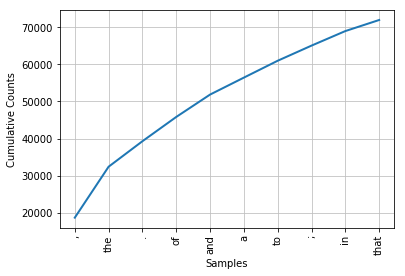

In [111]:
fdist1.plot(10, cumulative=True)

## Fine-grained Selection of Words

**细粒度选择的单词**

接下来，我们看看文本中的长单词（long words），可能这会是更多的特点和信息。

（1）

a.		{w | w ∈ V & P(w)}

b.		[w for w in V if p(w)]



In [116]:
V = set(text1)
long_words = {w for w in V if len(w) > 15 }

In [115]:
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

In [121]:
fdist5 = FreqDist(text5)
fdist5

FreqDist({'.': 1268, 'JOIN': 1021, 'PART': 1016, '?': 737, 'lol': 704, 'to': 658, 'i': 648, 'the': 646, 'you': 635, ',': 596, ...})

In [129]:
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w]> 7)

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

## Collocations and Bigrams

词语搭配是指经常一起出现的词序列，为了获取搭配首先需要从文本中提取**双连词**，使用 **bigrams** 就可以实现这个功能

In [11]:
list(bigrams(["more", "is", "said", "than", "done"]))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

除了一些含生僻词的情况，英语文本中的词语搭配基本上是频繁出现的双连词。`nltk.text.Text` 中提供了 `collocations(self, num=20, window_size=2)` 方法可以直接从Text文本中提取常出现的词语搭配，如下

In [13]:
text4.collocation_list()

['United States',
 'fellow citizens',
 'four years',
 'years ago',
 'Federal Government',
 'General Government',
 'American people',
 'Vice President',
 'God bless',
 'Chief Justice',
 'Old World',
 'Almighty God',
 'Fellow citizens',
 'Chief Magistrate',
 'every citizen',
 'one another',
 'fellow Americans',
 'Indian tribes',
 'public debt',
 'foreign nations']

In [14]:
text8.collocation_list()

['would like',
 'medium build',
 'social drinker',
 'quiet nights',
 'non smoker',
 'long term',
 'age open',
 'Would like',
 'easy going',
 'financially secure',
 'fun times',
 'similar interests',
 'Age open',
 'weekends away',
 'poss rship',
 'well presented',
 'never married',
 'single mum',
 'permanent relationship',
 'slim build']

## Counting Other Things

In [3]:
[len(w) for w in text1]

[1,
 4,
 4,
 2,
 6,
 8,
 4,
 1,
 9,
 1,
 1,
 8,
 2,
 1,
 4,
 11,
 5,
 2,
 1,
 7,
 6,
 1,
 3,
 4,
 5,
 2,
 10,
 2,
 4,
 1,
 5,
 1,
 4,
 1,
 3,
 5,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 7,
 3,
 3,
 8,
 3,
 8,
 1,
 4,
 1,
 5,
 12,
 1,
 9,
 11,
 4,
 3,
 3,
 3,
 5,
 2,
 3,
 3,
 5,
 7,
 2,
 3,
 5,
 1,
 2,
 5,
 2,
 4,
 3,
 3,
 8,
 1,
 2,
 7,
 6,
 8,
 3,
 2,
 3,
 9,
 1,
 1,
 5,
 3,
 4,
 2,
 4,
 2,
 6,
 6,
 1,
 3,
 2,
 5,
 4,
 2,
 4,
 4,
 1,
 5,
 1,
 4,
 2,
 2,
 2,
 6,
 2,
 3,
 6,
 7,
 3,
 1,
 7,
 9,
 1,
 3,
 6,
 1,
 1,
 5,
 6,
 5,
 6,
 3,
 13,
 2,
 3,
 4,
 1,
 3,
 7,
 4,
 5,
 2,
 3,
 4,
 2,
 2,
 8,
 1,
 5,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 4,
 6,
 2,
 5,
 4,
 9,
 2,
 7,
 1,
 3,
 2,
 3,
 1,
 5,
 2,
 6,
 2,
 7,
 2,
 2,
 7,
 1,
 1,
 10,
 1,
 5,
 1,
 3,
 2,
 2,
 4,
 11,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 2,
 6,
 2,
 2,
 10,
 1,
 1,
 10,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 6,
 1,
 3,
 1,
 5,
 1,
 4,
 1,
 7,
 1,
 5,
 1,
 9,

In [4]:
fdist = FreqDist([len(w) for w in text1])
fdist

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [6]:
fdist.keys()

dict_keys([1, 4, 2, 6, 8, 9, 11, 5, 7, 3, 10, 12, 13, 14, 16, 15, 17, 18, 20])

In [8]:
fdist.items()

dict_items([(1, 47933), (4, 42345), (2, 38513), (6, 17111), (8, 9966), (9, 6428), (11, 1873), (5, 26597), (7, 14399), (3, 50223), (10, 3528), (12, 1053), (13, 567), (14, 177), (16, 22), (15, 70), (17, 12), (18, 1), (20, 1)])

In [9]:
fdist.max()

3

In [10]:
fdist.freq(3)

0.19255882431878046

**NLTK 频率分布类中定义的函数**

- `fdist = FreqDist(samples)` 创建包含给定样本的频率分布
- `fdist.inc(sample)` 增加样本
- `fdist['monstrous']` 计数给定样本出现的次数
- `fdist.freq('monstrous')` 给定样本的频率
- `fdist.N()` 样本总数
- `fdist.keys()` 以频率递减顺序排序的样本链表
- `for sample in fdist:` 以频率递减的顺序遍历样本
- `fdist.max()` 数值最大的样本
- `fdist.tabulate()` 绘制频率分布表
- `fdist.plot()` 绘制频率分布图
- `fdist.plot(cumulative=True)` 绘制累积频率分布图
- `fdist1 < fdist2 测试样本在 fdist1` 中出现的频率是否小于 fdist2

# 回到Python:决策和控制
## 条件

In [15]:
sent7

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [16]:
[ w for w in sent7 if len(w) < 4]

[',', '61', 'old', ',', 'the', 'as', 'a', '29', '.']

In [17]:
[w for w in sent7 if len(w) <= 4]

[',', '61', 'old', ',', 'will', 'join', 'the', 'as', 'a', 'Nov.', '29', '.']

In [18]:
[w for w in sent7 if len(w) == 4]

['will', 'join', 'Nov.']

In [19]:
[w for w in sent7 if len(w) != 4]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 '29',
 '.']

所有这些例子都有一个共同的模式: `[w for w in text if condition ]`,其中 `condition`是 Python 中的一个“测试”,得到真 rue)或者假(false)。在前面的代码例子所示的情况中,条件始终是数值比较。

**一些词比较运算符** 

- `s.startswith(t)` 测试 s 是否以 t 开头
- `s.endswith(t)` 测试 s 是否以 t 结尾
- `t in s` 测试 s 是否包含 t
- `s.islower()` 测试 s 中所有字符是否都是小写字母
- `s.isupper()` 测试 s 中所有字符是否都是大写字母
- `s.isalpha()` 测试 s 中所有字符是否都是字母
- `s.isalnum()` 测试 s 中所有字符是否都是字母或数字
- `s.isdigit()` 测试 s 中所有字符是否都是数字
- `s.istitle()` 测试 s 是否首字母大写(s 中所有的词都首字母大写)


In [22]:
    sorted([w for w in set(text1) if w.endswith('ableness')])

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [24]:
sorted([w for w in set(text4) if 'gnt' in w])

['Sovereignty', 'sovereignties', 'sovereignty']

In [25]:
sorted([w for w in set(text6) if w.istitle()])

['A',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh',
 'Aaauugh',
 'Aagh',
 'Aah',
 'Aauuggghhh',
 'Aauuugh',
 'Aauuuuugh',
 'Aauuuves',
 'Action',
 'Actually',
 'African',
 'Ages',
 'Aggh',
 'Agh',
 'Ah',
 'Ahh',
 'Alice',
 'All',
 'Allo',
 'Almighty',
 'Alright',
 'Am',
 'Amen',
 'An',
 'Anarcho',
 'And',
 'Angnor',
 'Anthrax',
 'Antioch',
 'Anybody',
 'Anyway',
 'Apples',
 'Aramaic',
 'Are',
 'Arimathea',
 'Armaments',
 'Arthur',
 'As',
 'Ask',
 'Assyria',
 'At',
 'Attila',
 'Augh',
 'Autumn',
 'Auuuuuuuugh',
 'Away',
 'Ay',
 'Ayy',
 'B',
 'Back',
 'Bad',
 'Badon',
 'Battle',
 'Be',
 'Beast',
 'Bedevere',
 'Bedwere',
 'Behold',
 'Between',
 'Beyond',
 'Black',
 'Bloody',
 'Blue',
 'Bon',
 'Bones',
 'Book',
 'Bors',
 'Brave',
 'Bravely',
 'Bravest',
 'Bread',
 'Bridge',
 'Bring',
 'Bristol',
 'Britain',
 'Britons',
 'Brother',
 'Build',
 'Burn',
 'But',
 'By',
 'C',
 'Caerbannog',
 'Camaaaaaargue',
 'Camelot',
 'Castle',
 'Chap

In [26]:
sorted([w for w in set(sent7) if w.isdigit()])

['29', '61']

In [27]:
sorted([w for w in set(text7) if '-' in w and 'index' in w])

['Stock-index',
 'index-arbitrage',
 'index-fund',
 'index-options',
 'index-related',
 'stock-index']

In [28]:
sorted([wd for wd in set(text3) if wd.istitle() and len(wd) > 10])

['Abelmizraim',
 'Allonbachuth',
 'Beerlahairoi',
 'Canaanitish',
 'Chedorlaomer',
 'Girgashites',
 'Hazarmaveth',
 'Hazezontamar',
 'Ishmeelites',
 'Jegarsahadutha',
 'Jehovahjireh',
 'Kirjatharba',
 'Melchizedek',
 'Mesopotamia',
 'Peradventure',
 'Philistines',
 'Zaphnathpaaneah']

In [29]:
sorted([w for w in set(sent7) if not w.islower()])

[',', '.', '29', '61', 'Nov.', 'Pierre', 'Vinken']

In [30]:
sorted([t for t in set(text2) if 'cie' in t or 'cei' in t])

['ancient',
 'ceiling',
 'conceit',
 'conceited',
 'conceive',
 'conscience',
 'conscientious',
 'conscientiously',
 'deceitful',
 'deceive',
 'deceived',
 'deceiving',
 'deficiencies',
 'deficiency',
 'deficient',
 'delicacies',
 'excellencies',
 'fancied',
 'insufficiency',
 'insufficient',
 'legacies',
 'perceive',
 'perceived',
 'perceiving',
 'prescience',
 'prophecies',
 'receipt',
 'receive',
 'received',
 'receiving',
 'society',
 'species',
 'sufficient',
 'sufficiently',
 'undeceive',
 'undeceiving']

## 对每个元素进行操作


In [31]:
[len(w) for w in text1]

[1,
 4,
 4,
 2,
 6,
 8,
 4,
 1,
 9,
 1,
 1,
 8,
 2,
 1,
 4,
 11,
 5,
 2,
 1,
 7,
 6,
 1,
 3,
 4,
 5,
 2,
 10,
 2,
 4,
 1,
 5,
 1,
 4,
 1,
 3,
 5,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 7,
 3,
 3,
 8,
 3,
 8,
 1,
 4,
 1,
 5,
 12,
 1,
 9,
 11,
 4,
 3,
 3,
 3,
 5,
 2,
 3,
 3,
 5,
 7,
 2,
 3,
 5,
 1,
 2,
 5,
 2,
 4,
 3,
 3,
 8,
 1,
 2,
 7,
 6,
 8,
 3,
 2,
 3,
 9,
 1,
 1,
 5,
 3,
 4,
 2,
 4,
 2,
 6,
 6,
 1,
 3,
 2,
 5,
 4,
 2,
 4,
 4,
 1,
 5,
 1,
 4,
 2,
 2,
 2,
 6,
 2,
 3,
 6,
 7,
 3,
 1,
 7,
 9,
 1,
 3,
 6,
 1,
 1,
 5,
 6,
 5,
 6,
 3,
 13,
 2,
 3,
 4,
 1,
 3,
 7,
 4,
 5,
 2,
 3,
 4,
 2,
 2,
 8,
 1,
 5,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 4,
 6,
 2,
 5,
 4,
 9,
 2,
 7,
 1,
 3,
 2,
 3,
 1,
 5,
 2,
 6,
 2,
 7,
 2,
 2,
 7,
 1,
 1,
 10,
 1,
 5,
 1,
 3,
 2,
 2,
 4,
 11,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 2,
 6,
 2,
 2,
 10,
 1,
 1,
 10,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 6,
 1,
 3,
 1,
 5,
 1,
 4,
 1,
 7,
 1,
 5,
 1,
 9,

In [32]:
[w.upper() for w in text1]

['[',
 'MOBY',
 'DICK',
 'BY',
 'HERMAN',
 'MELVILLE',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'SUPPLIED',
 'BY',
 'A',
 'LATE',
 'CONSUMPTIVE',
 'USHER',
 'TO',
 'A',
 'GRAMMAR',
 'SCHOOL',
 ')',
 'THE',
 'PALE',
 'USHER',
 '--',
 'THREADBARE',
 'IN',
 'COAT',
 ',',
 'HEART',
 ',',
 'BODY',
 ',',
 'AND',
 'BRAIN',
 ';',
 'I',
 'SEE',
 'HIM',
 'NOW',
 '.',
 'HE',
 'WAS',
 'EVER',
 'DUSTING',
 'HIS',
 'OLD',
 'LEXICONS',
 'AND',
 'GRAMMARS',
 ',',
 'WITH',
 'A',
 'QUEER',
 'HANDKERCHIEF',
 ',',
 'MOCKINGLY',
 'EMBELLISHED',
 'WITH',
 'ALL',
 'THE',
 'GAY',
 'FLAGS',
 'OF',
 'ALL',
 'THE',
 'KNOWN',
 'NATIONS',
 'OF',
 'THE',
 'WORLD',
 '.',
 'HE',
 'LOVED',
 'TO',
 'DUST',
 'HIS',
 'OLD',
 'GRAMMARS',
 ';',
 'IT',
 'SOMEHOW',
 'MILDLY',
 'REMINDED',
 'HIM',
 'OF',
 'HIS',
 'MORTALITY',
 '.',
 '"',
 'WHILE',
 'YOU',
 'TAKE',
 'IN',
 'HAND',
 'TO',
 'SCHOOL',
 'OTHERS',
 ',',
 'AND',
 'TO',
 'TEACH',
 'THEM',
 'BY',
 'WHAT',
 'NAME',
 'A',
 'WHALE',
 '-',
 'FISH',
 'IS',
 'TO',
 'BE',
 

In [33]:
len(text1)

260819

In [34]:
len(set(text1))

19317

In [35]:
len(set([w.lower() for w in text1]))

17231

In [41]:
len(set([w.lower() for w in text1 if w.isalpha()]))

16948

## 嵌套代码块
## 条件循环

# 自动理解自然语言
## 词意消歧

在**词意消歧**中,我们要算出特定上下文中的词被赋予的是哪个意思。思考存在歧义的词 _serve_ 和 _dish_ :
- _serve_: help with food or drink; hold an office; put ball into play
- _dish_: plate; course of a meal; communications device

观察(下面的斜体字的含义有助于我们解释 `by` 的含义。
- The lost children were found by the _searchers_ (施事)
- The lost children were found by the _mountain_ (位置格)
- The lost children were found by the _afternoon_ (时间)

## 指代消解
一种更深刻的语言理解是解决“谁对谁做了什么”,即检测主语和动词的宾语。虽然你在小学已经学会了这些,但它比你想象的更难。在句子 the thieves stole the paintings 中,很容易分辨出谁做了偷窃的行为。考虑下面句子的三种可能,尝试确定是什么被出售、被抓和被发现(其中一种情况是有歧义的)。

- The thieves stole the paintings. They were subsequently _sold_ .
- The thieves stole the paintings. They were subsequently _caught_ .
- The thieves stole the paintings. They were subsequently _found_ .

## 自动生成语言
如果我们能够解决自动语言理解等问题,我们将能够继续那些包含自动生成语言的任务,如**自动问答**和**机器翻译**。

## 机器翻译
机器翻译是困难的,因为一个给定的词可能有几种不同的解释(取决于它的意思),也因为必须改变词序才能与目标语言的语法结构保持一致。今天,这些困难遇到新情况,从新闻和政府网站发布的两种或两种以上的语言文档中可以收集到大量的相似文本。给出一个德文和英文双语的文档或者一个双语词典,我们就可以自动配对组成句子,这个过程叫做**文本对齐**。一旦我们有一百万或更多的句子对,就可以检测出相应的词和短语,并建立一个能用来翻译新文本的模型。

## 人机对话系统

## 文本的含义
## NLP 的局限性

尽管在很多如 RTE 这样的任务中研究取得了进展,但在现实世界的应用中已经部署的
语言理解系统仍不能进行常识推理或以一种一般的可靠的方式描绘这个世界的知识。我们在
等待这些困难的人工智能问题得到解决的同时,接受一些在推理和知识能力上存在严重限制
的自然语言系统是有必要的。因此,从一开始,自然语言处理研究的一个重要目标一直是使
用浅显但强大的技术代替无边无际的知识和推理能力,促进构建“语言理解”技术的艰巨任务
的不断取得进展。事实上,这是本书的目标之一,我们希望你能掌握这些知识和技能,构建
有效的自然语言处理系统,并为构建智能机器这一长期的理想做出贡献。

# 小结
# 深入阅读
如果需要第 1.5 节所讲述的话题以及更一般的 NLP 的相关信息,你可能想阅读以下的
优秀图书中的一本:
- Indurkhya, Nitin 和 Fred Damerau(合编,2010)自然语言处理手册(Handbook of Na
tural Language Processing)(第二版),Chapman & Hall/CRC。
- Jurafsky, Daniel 和 James Martin(2008)语音和语言处理(Speech and Language Proc
essing)(第二版),Prentice Hall。
- Mitkov, Ruslan(主编,2002 年),牛津计算语言学手册(The Oxford Handbook of Co
mputational Linguistics)。牛津大学出版社。(预计在 2010 年出第二版)

计算语言学协会(The Association for Computational Linguistics,简称 ACL)是代表 N
LP 领域的国际组织。ACL 网站上有许多有用的资源,包括:有关国际和地区的会议及研讨
会的信息;链接到数以百计有用资源的 ACL Wiki;包含过去 50 年以来大多数 NLP 研究文
献的 ACL 选集,里面的论文全部建立索引且可免费下载。

一些介绍语言学的优秀的教科书:(Finegan, 2007), (O’Grady et al., 2004), (OSU, 20
07)。你可能想查阅 LanguageLog,一个流行的语言学博客,不定期发布一些本书中描述的
技术应用。

# 练习

1. 尝试使用 Python 解释器作为一个计算器,输入表达式,如 12/(4+1)。

In [43]:
12 / ( 4 + 1 )

2.4

2. 26 个字母可以组成 26 的 10 次方或者 `26**10` 个 10 字母长的字符串。也就是 `141167095653376L`(结尾处的 L 只是表示这是 Python 长数字格式)。100 个字母长度的字符串可能有多少个?

In [44]:
26 ** 10

141167095653376

In [47]:
26 ** 100

3142930641582938830174357788501626427282669988762475256374173175398995908420104023465432599069702289330964075081611719197835869803511992549376

3. Python 乘法运算可应用于链表。当你输入 `['Monty', 'Python'] * 20` 或者 `3 * sent1` 会发生什么?

In [48]:
['Monty', 'Python'] * 20

['Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python',
 'Monty',
 'Python']

In [54]:
3 * sent1

['Call',
 'me',
 'Ishmael',
 '.',
 'Call',
 'me',
 'Ishmael',
 '.',
 'Call',
 'me',
 'Ishmael',
 '.']

4. 复习 1.1 节关于语言计算的内容。在 _text2_ 中有多少个词?有多少个不同的词?

In [55]:
len(text2)

141576

In [61]:
len(set(text2))

6833

In [62]:
len(set(w.lower() for w in text2 if w.isalpha()))

6283

5. 比较表格 1-1 中幽默和言情小说的词汇多样性得分,哪一个文体中词汇更丰富?

Genre	|Tokens|	Types|	Lexical diversity
----|----|----|----
skill and hobbies|	82345|	11935|	0.145
humor	|21695	|5017	|0.231
fiction: science	|14470	|3233	|0.223
press: reportage	|100554	|14394	|0.143
fiction: romance	|70022	|8452	|0.121
religion	|39399	|6373	|0.162

6. 制作《理智与情感》中四个主角:Elinor, Marianne,Edward 和 Willoughby 的分布图。在这部小说中关于男性和女性所扮演的不同角色,你能观察到什么?你能找出一对夫妻吗?